In [1]:
import higlass as hg
import numpy as np
import pandas as pd
import bioframe
import cooltools
import cooler
import matplotlib.pyplot as plt
import sys
import os
from cooltools.lib.numutils import adaptive_coarsegrain
from cooltools.lib.plotting import *

from mpl_toolkits import axes_grid1
sys.path.append('/home1/rahmanin/start/polychrom/projects/Site_wise_occupancy/OccupancyInputCTCF')

import utils 

### importing data, Hi-c maps 

In [2]:
bonev_file = '/project/fudenber_735/GEO/bonev_2017_GSE96107/distiller-0.3.1_mm10/results/coolers/HiC_ES.mm10.mapq_30.1000.mcool'
bonev_cooler = cooler.Cooler(bonev_file+'::resolutions/10000')
res = 10_000

### CTCF tabels

In [3]:
###importing ctcf peaks ####
ctcf_path='/project/fudenber_735/collaborations/karissa_2022/2022_09_features_for_RNAseq/ChIP-seq_in_WT-parental-E14'
ctcf = bioframe.read_table(ctcf_path+'/CTCF_peaks_called_on_4reps_foundInatLeast2reps_noBlacklist.bed', schema='bed')#.query(f'chrom in {clr.chromnames}')

### importing ctcf motifs ###
direct='/project/fudenber_735/motifs/mm10/jaspar/MA0139.1.tsv.gz'
motif=bioframe.read_table(direct)
motif=motif.rename(columns={0: 'chrom', 1: 'start',2:'end',3:'name',4:'score',5:'pval',6:'strand'})

### overlap between peaks and motifs### 
peaks_motifs = bioframe.overlap(ctcf,motif,how='inner')
peaks_motifs=peaks_motifs.rename(columns={'strand':'strand_','strand_':'strand'})
peaks_motifs=peaks_motifs[['chrom','start','end','strand']]

### RAD21

In [4]:
RAD21=bioframe.read_table(ctcf_path+'/RAD21_peaks_called_on_6reps_foundInatLeast3reps_noBlacklist.bed', schema='bed')#.query(f'chrom in {clr.chromnames}')
ctcf['mid']=(ctcf.end+ctcf.start)/2
RAD21['mid']=(RAD21.end+RAD21.start)/2

### visualizing the domain

/tmp/SLURM_24290007/ipykernel_20244/2778361806.py:7: RuntimeWarning: divide by zero encountered in log10
  im = plt.matshow(np.log10(cname),


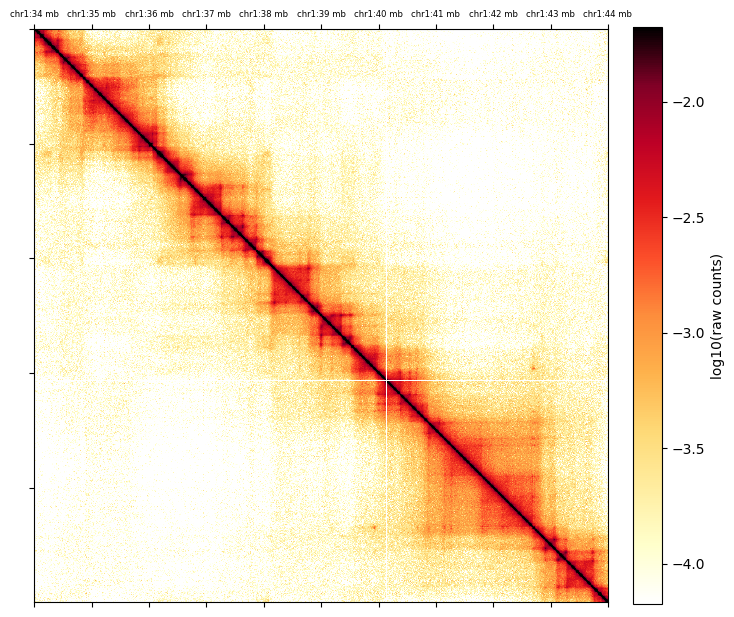

In [7]:
plt.figure(figsize=(8.1,8.10))

region = 'chr1:34000000-44000000'
region_start=bioframe.parse_region_string(region)[1]
cname = (cooler.Cooler(bonev_file+'::resolutions/'+str(res)).matrix(balance=True).fetch(region))

im = plt.matshow(np.log10(cname), 
                 vmax = np.log10(np.nanmedian(np.diag(cname,2))), 
                 vmin= np.log10(np.nanmedian(np.diag(cname,2)))-2.5, 
                 fignum=False ,cmap='fall' ); 
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(raw counts)')
plt.xticks(utils.axes_ary(region)[0], fontsize = 6.1)
plt.gca().set_xticklabels(utils.axes_ary(region)[1])
plt.gca().set_yticklabels([])
plt.savefig('../outputs/chrdomain_%s.png'%region)
plt.show()

/tmp/SLURM_24290007/ipykernel_20244/534867487.py:7: RuntimeWarning: divide by zero encountered in log10
  im = plt.matshow(np.log10(cname),


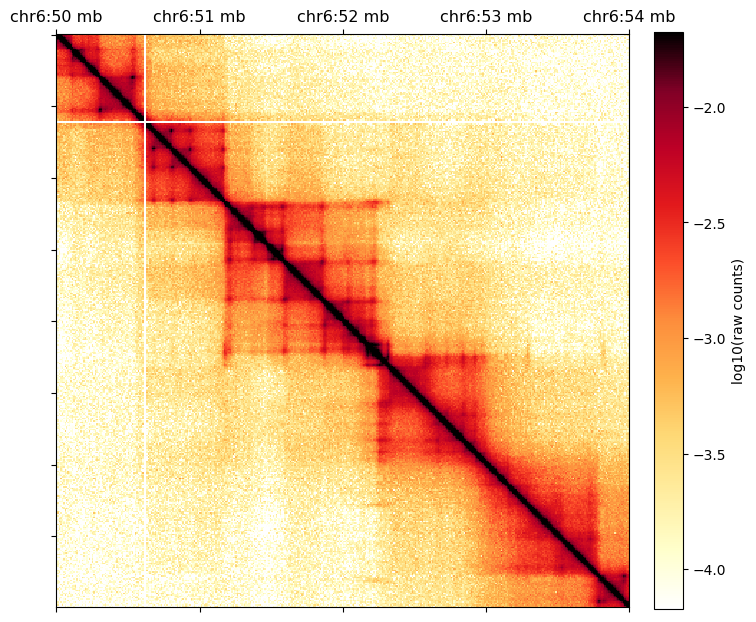

In [9]:
plt.figure(figsize=(8.1,8.10))

region = 'chr6:50000000-54000000'

cname = (cooler.Cooler(bonev_file+'::resolutions/'+str(res)).matrix(balance=True).fetch(region))

im = plt.matshow(np.log10(cname), 
                 vmax = np.log10(np.nanmedian(np.diag(cname,2))), 
                 vmin= np.log10(np.nanmedian(np.diag(cname,2)))-2.5, 
                 fignum=False ,cmap='fall' ); 
plt.colorbar(im ,fraction=0.046, pad=0.04, label='log10(raw counts)')
plt.xticks(utils.axes_ary(region)[0], fontsize = 11.5)
plt.gca().set_xticklabels(utils.axes_ary(region)[1])
plt.gca().set_yticklabels([])
plt.savefig('../outputs/chrdomain_%s.png'%region)
plt.show()

In [31]:
region_ctcf_motif = utils.region_data_frame(peaks_motifs, region = 'chr1:34000000-35000000')

/home1/rahmanin/start/polychrom/projects/Site_wise_occupancy/OccupancyInputCTCF/utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_dataframe['mid']=(region_dataframe.end+region_dataframe.start)/2
/home1/rahmanin/start/polychrom/projects/Site_wise_occupancy/OccupancyInputCTCF/utils.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_dataframe['lattice_loc'] = ((region_dataframe['mid'] - region_start) // lattice_size).astype('int')


In [36]:
region = 'chr1:34000000-34100000'
df1 = utils.region_data_frame(ctcf, region = region)
df2 = utils.region_data_frame(motif, region = region)
overlapping_intervals = bioframe.overlap(df1, df2, how='inner', suffixes=('_1','_2'))
display(overlapping_intervals)


/home1/rahmanin/start/polychrom/projects/Site_wise_occupancy/OccupancyInputCTCF/utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_dataframe['mid']=(region_dataframe.end+region_dataframe.start)/2
/home1/rahmanin/start/polychrom/projects/Site_wise_occupancy/OccupancyInputCTCF/utils.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_dataframe['lattice_loc'] = ((region_dataframe['mid'] - region_start) // lattice_size).astype('int')
/home1/rahmanin/start/polychrom/projects/Site_wise_occu

,chrom_1,start_1,end_1,name_1,score_1,strand_1,mid_1,lattice_loc_1,chrom_2,start_2,end_2,name_2,score_2,pval_2,strand_2,mid_2,lattice_loc_2
0,chr1,34005641,34006016,CTCF_4reps_peak_406,57.35360,NaN,34005828.5,23,chr1,34005817,34005836,CTCF,810,403,+,34005826.5,23
1,chr1,34011003,34011576,CTCF_4reps_peak_407,81.03111,NaN,34011289.5,45,chr1,34011254,34011273,CTCF,824,430,+,34011263.5,45
2,chr1,34049624,34049965,CTCF_4reps_peak_408,17.84861,NaN,34049794.5,199,chr1,34049802,34049821,CTCF,901,607,-,34049811.5,199
3,chr1,34068201,34068742,CTCF_4reps_peak_411,111.66768,NaN,34068471.5,273,chr1,34068515,34068534,CTCF,925,680,-,34068524.5,274
4,chr1,34093645,34094093,CTCF_4reps_peak_412,95.51875,NaN,34093869.0,375,chr1,34093844,34093863,CTCF,800,386,+,34093853.5,375


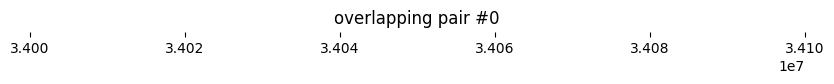

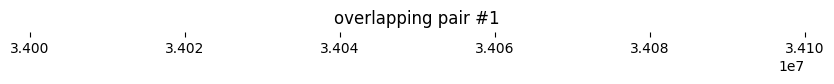

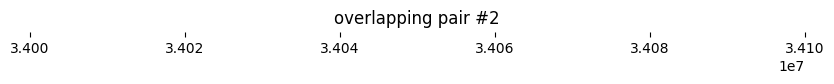

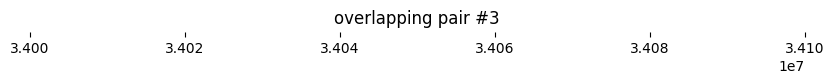

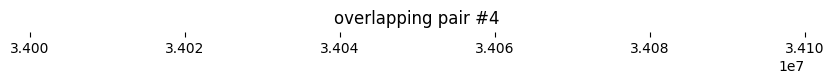

In [40]:
for i, reg_pair in overlapping_intervals.iterrows():
    bioframe.vis.plot_intervals_arr(
        starts = [reg_pair.start_1,reg_pair.start_2],
        ends = [reg_pair.end_1,reg_pair.end_2],
        colors = ['skyblue', 'lightpink'],
        levels = [2,1],
        xlim = (34000000,34100000),
        show_coords = True)
    plt.title(f'overlapping pair #{i}')

### creating ctcf table

In [23]:
region = 'chr1:34000000-44000000'


In [19]:
region_ctcf_motif = utils.region_data_frame(peaks_motifs, region = 'chr1:34000000-44000000')
region_ = bioframe.parse_region_string('chr1:34000000-44000000')
region_ctcf_motif.to_csv('{name}_{begin}_{end}.csv'.format(name = region_[0], begin = region_[1], end = region_[2]) ,index=False)
region_ctcf_motif

/home1/rahmanin/start/polychrom/projects/Site_wise_occupancy/OccupancyInputCTCF/utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_dataframe['mid']=(region_dataframe.end+region_dataframe.start)/2
/home1/rahmanin/start/polychrom/projects/Site_wise_occupancy/OccupancyInputCTCF/utils.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_dataframe['lattice_loc'] = ((region_dataframe['mid'] - region_start) // lattice_size).astype('int')


,chrom,start,end,strand,mid,lattice_loc
0,chr1,34005641,34006016,+,34005828.5,23
1,chr1,34011003,34011576,+,34011289.5,45
2,chr1,34049624,34049965,-,34049794.5,199
3,chr1,34068201,34068742,-,34068471.5,273
4,chr1,34093645,34094093,+,34093869.0,375
...,...,...,...,...,...,...
268,chr1,43738188,43738540,-,43738364.0,38953
269,chr1,43760145,43760509,+,43760327.0,39041
270,chr1,43762617,43762972,-,43762794.5,39051
271,chr1,43898949,43899413,+,43899181.0,39596


In [20]:
region_ctcf_motif = utils.region_data_frame(peaks_motifs, region = 'chr6:50000000-54000000')
region_ = bioframe.parse_region_string('chr6:50000000-54000000')
region_ctcf_motif.to_csv('{name}_{begin}_{end}.csv'.format(name = region_[0], begin = region_[1], end = region_[2]) ,index=False)
region_ctcf_motif

/home1/rahmanin/start/polychrom/projects/Site_wise_occupancy/OccupancyInputCTCF/utils.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_dataframe['mid']=(region_dataframe.end+region_dataframe.start)/2
/home1/rahmanin/start/polychrom/projects/Site_wise_occupancy/OccupancyInputCTCF/utils.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_dataframe['lattice_loc'] = ((region_dataframe['mid'] - region_start) // lattice_size).astype('int')


,chrom,start,end,strand,mid,lattice_loc
0,chr6,50066186,50066527,+,50066356.5,265
1,chr6,50109867,50110506,-,50110186.5,440
2,chr6,50109867,50110506,-,50110186.5,440
3,chr6,50112734,50113150,+,50112942.0,451
4,chr6,50180221,50180611,-,50180416.0,721
...,...,...,...,...,...,...
135,chr6,53958374,53958858,+,53958616.0,15834
136,chr6,53961954,53962439,-,53962196.5,15848
137,chr6,53968504,53968872,+,53968688.0,15874
138,chr6,53982680,53983085,+,53982882.5,15931


### processing for simulaiton

In [3]:
input_file = 'data/chr1_34mb_44mb_with_predicted_occupancy.csv'
df = pd.read_csv(input_file)
df = df.query('lattice_loc<=10000')
df

,chrom,start,end,mid,strand,lattice_loc,predicted_occupancy
0,chr1,34005641,34006016,34005828.5,+,23,0.089047
1,chr1,34011003,34011576,34011289.5,+,45,0.220059
2,chr1,34049624,34049965,34049794.5,-,199,0.260436
3,chr1,34068201,34068742,34068471.5,-,273,0.644597
4,chr1,34093645,34094093,34093869.0,+,375,0.197648
...,...,...,...,...,...,...,...
63,chr1,36321730,36322172,36321951.0,-,9287,0.180413
64,chr1,36324025,36324431,36324228.0,+,9296,0.257837
65,chr1,36454412,36454833,36454622.5,+,9818,0.277825
66,chr1,36471503,36472006,36471754.5,-,9887,0.090944


In [4]:
dataframe = utils.make_region_occupancy(input_file)
target_dataframe = dataframe.query('lattice_loc<=10000')
target_dataframe

,chrom,start,end,mid,strand,lattice_loc,predicted_occupancy
0,chr1,34005641,34006016,34005828.5,+,23,0.089047
1,chr1,34011003,34011576,34011289.5,+,45,0.220059
2,chr1,34049624,34049965,34049794.5,-,199,0.260436
3,chr1,34068201,34068742,34068471.5,-,273,0.644597
4,chr1,34093645,34094093,34093869.0,+,375,0.197648
...,...,...,...,...,...,...,...
234,chr1,43738188,43738540,43738364.0,-,38953,0.254767
235,chr1,43760145,43760509,43760327.0,+,39041,0.337179
236,chr1,43762617,43762972,43762794.5,-,39051,0.163237
237,chr1,43898949,43899413,43899181.0,+,39596,0.288898


In [11]:
target_dataframe

,chrom,start,end,mid,strand,lattice_loc,predicted_occupancy
0,chr1,34005641,34006016,34005828.5,+,23,0.089047
1,chr1,34011003,34011576,34011289.5,+,45,0.220059
2,chr1,34049624,34049965,34049794.5,-,199,0.260436
3,chr1,34068201,34068742,34068471.5,-,273,0.644597
4,chr1,34093645,34094093,34093869.0,+,375,0.197648
...,...,...,...,...,...,...,...
56,chr1,36321730,36322172,36321951.0,-,9287,0.180413
57,chr1,36324025,36324431,36324228.0,+,9296,0.257837
58,chr1,36454412,36454833,36454622.5,+,9818,0.277825
59,chr1,36471503,36472006,36471754.5,-,9887,0.090944


### making ctcf sites

In [13]:
ctcfleftposition = list(target_dataframe[target_dataframe['strand']=='+']['lattice_loc'])
ctcfrightposition = list(target_dataframe[target_dataframe['strand']=='-']['lattice_loc'])
print(ctcfleftposition,ctcfrightposition)

[23, 45, 375, 760, 806, 874, 1852, 1944, 2045, 2053, 2165, 2336, 2570, 2954, 3106, 3167, 3469, 3567, 4131, 5067, 5553, 5570, 6907, 7063, 7358, 8581, 8899, 9025, 9296, 9818] [199, 273, 659, 1164, 1640, 1944, 2064, 2336, 2410, 2803, 3102, 3469, 3588, 3648, 5067, 5542, 5861, 5913, 6864, 7387, 8041, 8260, 8539, 8598, 9012, 9019, 9109, 9117, 9287, 9887, 9970]
